**Importing Libraries and the Dataset**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('emails.csv')

In [5]:
df

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [6]:
df.head()

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1


In [7]:
df.tail()

,text,spam
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0
5727,Subject: news : aurora 5 . 2 update aurora ve...,0


In [8]:
df.describe()

,spam
count,5728.000000
mean,0.238827
std,0.426404
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5728 entries, 0 to 5727
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    5728 non-null   object
 1   spam    5728 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 89.6+ KB


**Visualising the Dataset**

In [10]:
spam = df[df['spam']==1]

In [11]:
ham = df[df['spam']==0]

In [12]:
spam

,text,spam
0,Subject: naturally irresistible your corporate...,1
1,Subject: the stock trading gunslinger fanny i...,1
2,Subject: unbelievable new homes made easy im ...,1
3,Subject: 4 color printing special request add...,1
4,"Subject: do not have money , get software cds ...",1
...,...,...
1363,Subject: are you ready to get it ? hello ! v...,1
1364,Subject: would you like a $ 250 gas card ? do...,1
1365,"Subject: immediate reply needed dear sir , i...",1
1366,Subject: wanna see me get fisted ? fist bang...,1


In [13]:
ham

,text,spam
1368,"Subject: hello guys , i ' m "" bugging you "" f...",0
1369,Subject: sacramento weather station fyi - - ...,0
1370,Subject: from the enron india newsdesk - jan 1...,0
1371,Subject: re : powerisk 2001 - your invitation ...,0
1372,Subject: re : resco database and customer capt...,0
...,...,...
5723,Subject: re : research and development charges...,0
5724,"Subject: re : receipts from visit jim , than...",0
5725,Subject: re : enron case study update wow ! a...,0
5726,"Subject: re : interest david , please , call...",0


In [14]:
print('Spam % = ',len(spam)/len(df)*100)

Spam % =  23.88268156424581


In [15]:
print('Ham % = ',len(ham)/len(df)*100)

Ham % =  76.11731843575419


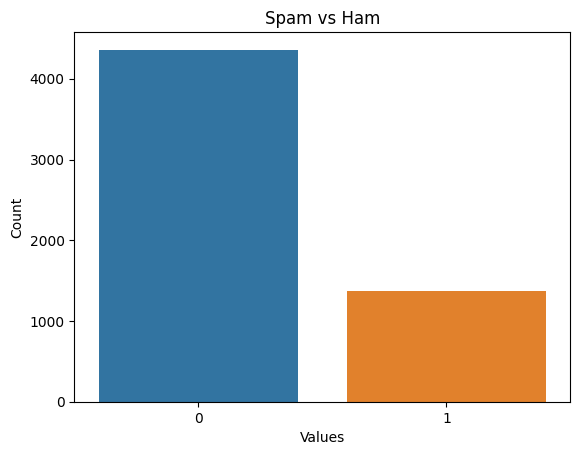

In [16]:
sns.countplot(data=df, x='spam')
plt.title('Spam vs Ham')
plt.xlabel('Values')
plt.ylabel('Count')
plt.show()

**Creating Testing and Training Dataset**

Count Vectorizer Example

In [17]:
from sklearn.feature_extraction.text import CountVectorizer

In [18]:
sample_data = ['This is the first document.','This document is the second document.','And this is the third one.','Is this the first document?']

In [19]:

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)

In [20]:
print(X.toarray())

[[0 1 1 1 0 0 1 0 1]
 [0 2 0 1 0 1 1 0 1]
 [1 0 0 1 1 0 1 1 1]
 [0 1 1 1 0 0 1 0 1]]


In [21]:
print(vectorizer.get_feature_names_out())

['and' 'document' 'first' 'is' 'one' 'second' 'the' 'third' 'this']


Applying Count Vectorizer to our problem

In [22]:
from sklearn.feature_extraction.text import CountVectorizer

In [23]:
vectorizer = CountVectorizer()
spamham = vectorizer.fit_transform(df['text'])

In [24]:
print(vectorizer.get_feature_names_out())

['00' '000' '0000' ... 'zzn' 'zzncacst' 'zzzz']


In [25]:
print(spamham.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [4 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [26]:
spamham.shape

(5728, 37303)

**Training the Model**

In [27]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()


In [28]:
label = df['spam'].values


In [29]:
classifier.fit(spamham,label)

MultinomialNB()

In [30]:
testing = ['Free Money!!!','Hi Kim, Please let me know if you need any firther information. Thanks']

In [31]:
testing_df = vectorizer.transform(testing)

In [32]:
classifier.predict(testing_df)

array([1, 0], dtype=int64)

**Divide into Training and Test set before Training**

In [34]:
X = spamham
y = label

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.25)

In [36]:
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()

In [37]:
classifier.fit(X_train,y_train)

MultinomialNB()

**Evaluating the Model**

In [38]:
from sklearn.metrics import classification_report, confusion_matrix

In [41]:
y_predict_train = classifier.predict(X_train)

In [42]:
y_predict_train

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
cm = confusion_matrix(y_train,y_predict_train)

In [44]:
cm

array([[3280,   12],
       [   3, 1001]], dtype=int64)

<AxesSubplot: >

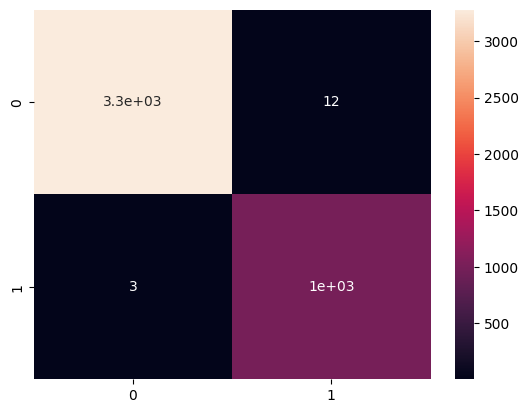

In [46]:
sns.heatmap(cm,annot=True)

<AxesSubplot: >

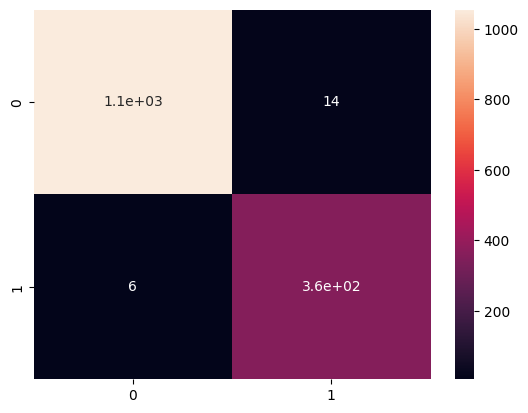

In [47]:
y_predict_test = classifier.predict(X_test)
cm_test = confusion_matrix(y_test,y_predict_test)
sns.heatmap(cm_test,annot=True)

In [48]:
print(classification_report(y_test,y_predict_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1068
           1       0.96      0.98      0.97       364

    accuracy                           0.99      1432
   macro avg       0.98      0.99      0.98      1432
weighted avg       0.99      0.99      0.99      1432

